In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Action:             #This class represents an action that can be taken in the bandit problem.
  def __init__(self, m):
    self.m = m            #Initializes an action with a given mean m, which represents the true mean reward of the action.
    self.mean = 0         #Represents the current estimate of the mean reward for the action.
    self.N = 0            #Represents the number of times this action has been chosen.
  def select(self):       #Chooses the action and returns a reward.
    return np.random.normal(0,1) + self.m   #It randomly samples from a normal distribution with mean self.m and standard deviation 1. This simulates the reward received when selecting the action.

# Update the action-value estimate
  def update(self, x, alpha=0.1):   #Updates the action's estimate of the mean reward based on a new observation x
    self.N += 1
    self.mean = self.mean + alpha*(x-self.mean) #simple incremental update rule that updates the mean reward estimate using a step size alpha which is 0.1.

**Update Method**
*   When an action is selected and its reward is observed (represented by x), the update method is called to update the action's estimate of the mean reward.
*   This method implements a simple incremental update formula for updating the mean reward estimate. The formula is derived from the sample mean update rule in statistics and is a form of incremental learning.
*   The formula updates the mean estimate (self.mean) by moving it slightly towards the observed reward x. The step size of the update is controlled by the alpha parameter, where smaller values of alpha result in slower adaptation to new observations.





# **Two Arm Bandit**

In [ ]:
'''This function takes four parameters:
m1: The mean reward of the first action (arm).
m2: The mean reward of the second action (arm).
eps: The probability of choosing a random action (exploration rate).
N: The total number of iterations (time steps) to run the bandit problem.'''

def two_arm_bandit_epsilon_greedy(m1, m2, eps, N):
  actions = [Action(m1), Action(m2)]                      #initializes two actions with means m1 and m2.
  data = np.empty(N)                                      #initializes an empty array data to store the rewards obtained in each iteration.
  explore,exploit=0,0                                     #counters explore and exploit to keep track of how many times the algorithm explores
                                                          #chooses a random action) and exploits (chooses the action with the highest estimated reward), respectively.'''
  for i in range(N):
    p = np.random.random()                                #generates a random number p between 0 and 1.
    if p < eps:                                           #If p is less than eps, the algorithm chooses to explore by randomly selecting one of the actions.
      j = np.random.choice(2)                             #'''If p is greater than or equal to eps, the algorithm chooses to exploit by selecting the action with
                                                           #  the highest estimated reward.'''
      explore+=1
    else:
      j = np.argmax([a.mean for a in actions])            #'''It selects the chosen action (j), selects a reward (x), and updates the action's estimate based
                                                           # on the observed reward using a fixed step size of 0.1.'''
      exploit+=1
    x = actions[j].select()
    actions[j].update(x,0.1)
    data[i] = x                                            #It stores the observed reward x in the data array.
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)     #calculates the cumulative average reward obtained at each time step and plots it.
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.show()
  print("No of times explored: ",explore)
  print("No of times exploited: ",exploit)
  for i in range(len(actions)):
    print(f"Mean of rewards from arm {i+1}: {actions[i].mean}")     #prints the final estimated mean rewards for each action.
  return cumulative_average                                         #returns the cumulative average rewards over time.

**Two Armed Bandit Problem**

*   The algorithm balances exploration and exploitation using the epsilon-greedy strategy. With probability eps, it explores by choosing a random action, and with probability 1-eps, it exploits by choosing the action with the highest estimated reward.
*   It maintains estimates of the mean rewards for each action and updates them incrementally based on observed rewards.
The algorithm's performance is evaluated by plotting the cumulative average reward over time and printing relevant statistics such as exploration and exploitation counts and final estimated mean rewards.



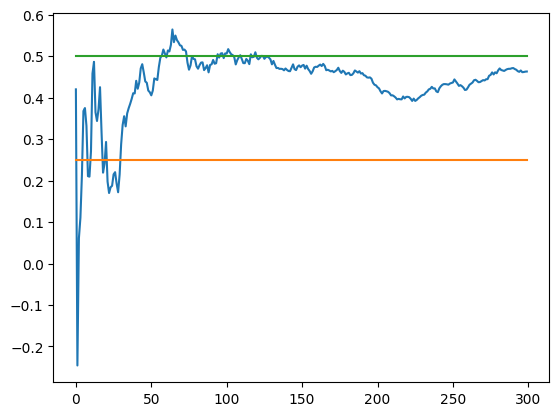

No of times explored:  36
No of times exploited:  264
Mean of rewards from arm 1: -0.04718128876897623
Mean of rewards from arm 2: 0.46117459326786486


In [ ]:
c1 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.1, 300)

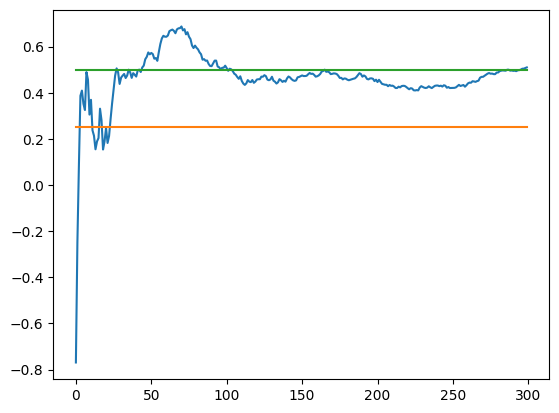

No of times explored:  21
No of times exploited:  279
Mean of rewards from arm 1: 0.12028789834630224
Mean of rewards from arm 2: 0.9220069276268874


In [ ]:
c2 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.05, 300)

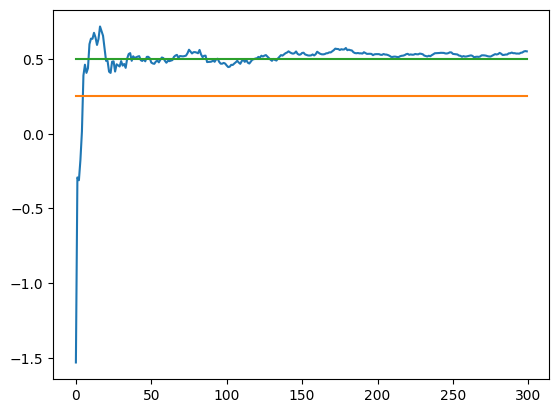

No of times explored:  2
No of times exploited:  298
Mean of rewards from arm 1: -0.15295850846638037
Mean of rewards from arm 2: 0.9162129947600484


In [ ]:
c3 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.01, 300)

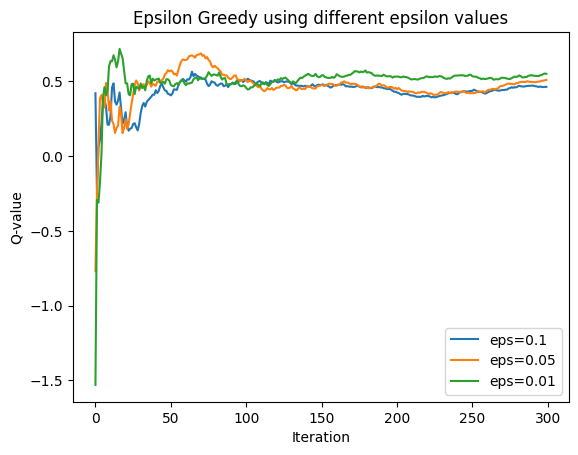

In [ ]:
plt.plot(c1,label='eps=0.1')
plt.plot(c2,label='eps=0.05')
plt.plot(c3,label='eps=0.01')
plt.xlabel('Iteration')
plt.ylabel('Q-value')
plt.title('Epsilon Greedy using different epsilon values')
plt.legend(loc='lower right')

# **Three Arm Bandit**

In [3]:
def three_arm_bandit_epsilon_greedy(m1, m2, m3, eps, N):
  actions = [Action(m1), Action(m2), Action(m3)]
  data = np.empty(N)
  explore,exploit=0,0
  for i in range(N):
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
      explore+=1
    else:
      j = np.argmax([a.mean for a in actions])
      exploit+=1
    x = actions[j].select()
    actions[j].update(x,0.1)
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.show()
  print("No of times explored: ",explore)
  print("No of times exploited: ",exploit)
  for i in range(len(actions)):
    print(f"Mean of rewards from arm {i+1}: {actions[i].mean}")
  return cumulative_average

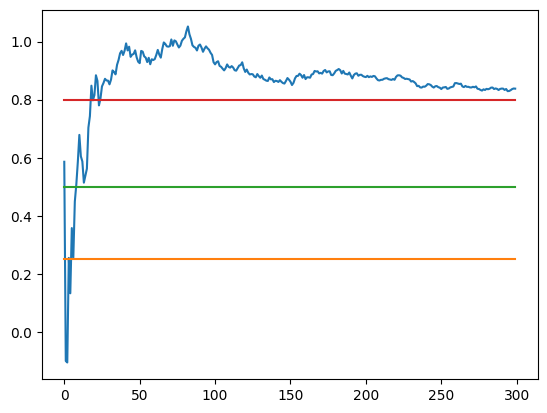

No of times explored:  33
No of times exploited:  267
Mean of rewards from arm 1: 0.1391005582831982
Mean of rewards from arm 2: 0.11283030874309036
Mean of rewards from arm 3: 0.8950767688527961


In [5]:
c1 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.1, 300)

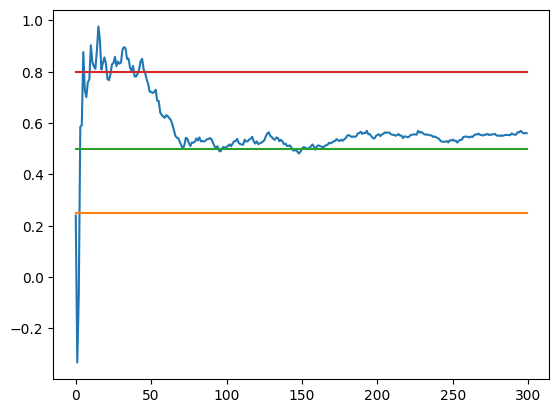

No of times explored:  20
No of times exploited:  280
Mean of rewards from arm 1: 0.12077699125873181
Mean of rewards from arm 2: 0.6210123639983721
Mean of rewards from arm 3: 0.060494136569889806


In [7]:
c2 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.05, 300)

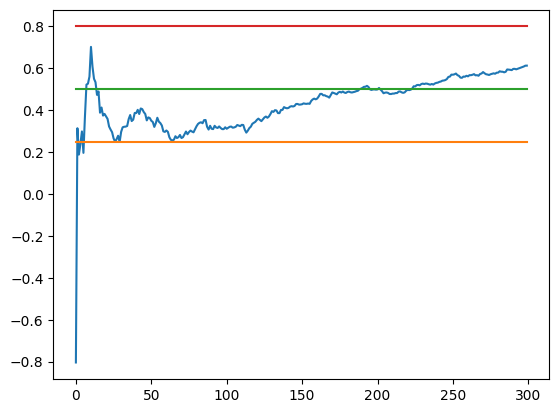

No of times explored:  2
No of times exploited:  298
Mean of rewards from arm 1: -0.08043077171789964
Mean of rewards from arm 2: 0.006266878260288045
Mean of rewards from arm 3: 1.1124169623731912


In [9]:
c3 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.01, 300)

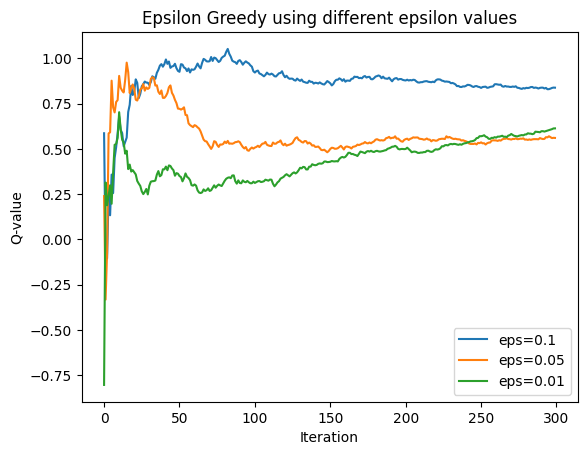

In [10]:
plt.plot(c1,label='eps=0.1')
plt.plot(c2,label='eps=0.05')
plt.plot(c3,label='eps=0.01')
plt.xlabel('Iteration')
plt.ylabel('Q-value')
plt.title('Epsilon Greedy using different epsilon values')
plt.legend(loc='lower right')